In [2]:
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf


In [3]:
df1 = pd.read_csv('H:/Toral/MLProject/Analysis/admissions.csv')
df1.head()

,pat_id,AdmissionCount
0,Z100381,1
1,Z1004200,1
2,Z1008845,3
3,Z1009607,1
4,Z1010297,1


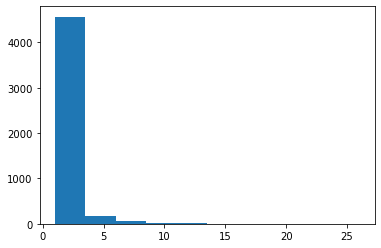

In [4]:
plt.hist(df1['AdmissionCount'], bins=10)
plt.show()

In [5]:
df2 = pd.read_csv('H:/Toral/MLProject/Analysis/dx.csv')
df2.head()

,pat_id,COPD,Depression,Diabetes,Dyslipidemia,Heart Failure,Hypertension,Schizophrenia,TotalComorb
0,Z100381,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1
1,Z1004200,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1
2,Z1008845,NaN,NaN,NaN,NaN,2.0,1.0,NaN,3
3,Z1009607,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2
4,Z1010297,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1


In [6]:
df2=df2.drop(columns=['COPD', 'Depression', 'Diabetes','Dyslipidemia', 'Hypertension', 'Schizophrenia', 'Heart Failure'])

In [7]:
df_comorb = pd.merge(df1, df2, on="pat_id")
df_comorb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4810 entries, 0 to 4809
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pat_id          4810 non-null   object
 1   AdmissionCount  4810 non-null   int64 
 2   TotalComorb     4810 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 150.3+ KB


In [8]:
df3 = pd.read_csv('H:/Toral/MLProject/Analysis/pdc.csv')
df3.head()

,pat_id,pdc_avg
0,Z6070059,73
1,Z8343302,49
2,Z8339927,81
3,Z6056509,97
4,Z6056787,47


In [9]:
df_pdc = pd.merge(df_comorb, df3, on="pat_id")
df_pdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4176 entries, 0 to 4175
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pat_id          4176 non-null   object
 1   AdmissionCount  4176 non-null   int64 
 2   TotalComorb     4176 non-null   int64 
 3   pdc_avg         4176 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 163.1+ KB


In [10]:
df4 = pd.read_csv('H:/Toral/MLProject/Analysis/insurance.csv')
df4

,pat_id,prod_type
0,Z2196139,MedicaidManagedCare
1,Z8327919,MedicaidManagedCare
2,Z4611783,MedicaidManagedCare
3,Z7681818,Medicaid
4,Z8224636,MedicaidManagedCare
...,...,...
13010,Z8749707,MedicaidManagedCare
13011,Z3009427,MedicaidManagedCare
13012,Z7511562,Medicaid
13013,Z7153130,MedicaidManagedCare


In [11]:
df_cohort = pd.merge(df_pdc, df4, on="pat_id")
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pat_id          569 non-null    object
 1   AdmissionCount  569 non-null    int64 
 2   TotalComorb     569 non-null    int64 
 3   pdc_avg         569 non-null    int64 
 4   prod_type       569 non-null    object
dtypes: int64(3), object(2)
memory usage: 26.7+ KB


In [12]:
df_cohort['Med_Adh'] = np.where(df_cohort['pdc_avg']<80, 0, 1)
df_cohort.head()

,pat_id,AdmissionCount,TotalComorb,pdc_avg,prod_type,Med_Adh
0,Z1105772,2,2,83,MedicaidManagedCare,1
1,Z1120868,2,2,0,Medicaid,0
2,Z1141583,1,1,43,Medicaid,0
3,Z1168575,1,1,64,MedicaidManagedCare,0
4,Z1351639,4,9,81,Medicaid,1


In [13]:
df_cohort.drop("pdc_avg", axis=1, inplace=True)


In [14]:
df_cohort.head()

,pat_id,AdmissionCount,TotalComorb,prod_type,Med_Adh
0,Z1105772,2,2,MedicaidManagedCare,1
1,Z1120868,2,2,Medicaid,0
2,Z1141583,1,1,Medicaid,0
3,Z1168575,1,1,MedicaidManagedCare,0
4,Z1351639,4,9,Medicaid,1


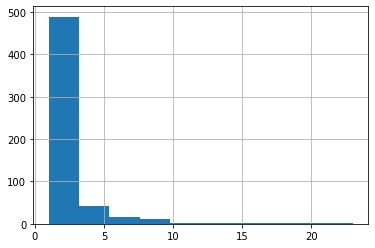

In [15]:
df_cohort['TotalComorb'].hist() 
plt.show()

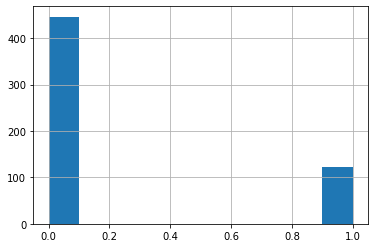

In [16]:
df_cohort['Med_Adh'].hist() 
plt.show()

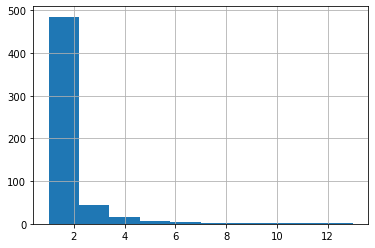

In [17]:
df_cohort['AdmissionCount'].hist() 
plt.show()

In [18]:
from statsmodels.stats.stattools import jarque_bera as jb
from statsmodels.stats.stattools import omni_normtest as omb
from statsmodels.compat import lzip
 
print('Mean='+str(round(df_cohort['AdmissionCount'].mean(), 2)))
print('Median='+str(round(df_cohort['AdmissionCount'].median(), 2)))
name = ['Jarque-Bera', 'Chi^2 two-tail probability', 'Skewness', 'Kurtosis']
test_results = jb(df_cohort['AdmissionCount'])
lzip(name, test_results)

Mean=1.68
Median=1.0


[('Jarque-Bera', 10082.676802528851),
 ('Chi^2 two-tail probability', 0.0),
 ('Skewness', 3.926978611584031),
 ('Kurtosis', 22.068172987197105)]

In [19]:
one_hot_encoded_data = pd.get_dummies(df_cohort, columns=['prod_type'])
one_hot_encoded_data.head()

,pat_id,AdmissionCount,TotalComorb,Med_Adh,prod_type_Medicaid,prod_type_MedicaidManagedCare
0,Z1105772,2,2,1,0,1
1,Z1120868,2,2,0,1,0
2,Z1141583,1,1,0,1,0
3,Z1168575,1,1,0,0,1
4,Z1351639,4,9,1,1,0


In [20]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   pat_id                         569 non-null    object
 1   AdmissionCount                 569 non-null    int64 
 2   TotalComorb                    569 non-null    int64 
 3   Med_Adh                        569 non-null    int32 
 4   prod_type_Medicaid             569 non-null    uint8 
 5   prod_type_MedicaidManagedCare  569 non-null    uint8 
dtypes: int32(1), int64(2), object(1), uint8(2)
memory usage: 21.1+ KB


In [21]:
# Create Training and Test data sets
mask = np.random.rand(len(one_hot_encoded_data)) < 0.8
df_train = one_hot_encoded_data[mask]
df_test = one_hot_encoded_data[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=456
Testing data set length=113


In [22]:
# Setup the regression expression in patsty notation. Basically we are telling patsy that Admissions Count is our 
# dependent variable and it depends on the regreassion variables:
#Total comorb, Med_adh, prod_type_medicaid, Prod_type_Medicaid Managed care 

expr = """AdmissionCount ~ TotalComorb  + Med_Adh + prod_type_Medicaid + prod_type_MedicaidManagedCare"""




In [23]:
# Setup X and y matrices for the training and testing data sets.

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [24]:
# Configure and fit OLSR model
olsr_results = smf.ols(expr, df_train).fit()

In [25]:
print(olsr_results.summary())

                            OLS Regression Results                            
Dep. Variable:         AdmissionCount   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     617.1
Date:                Sun, 15 May 2022   Prob (F-statistic):          2.24e-159
Time:                        15:07:45   Log-Likelihood:                -418.57
No. Observations:                 456   AIC:                             845.1
Df Residuals:                     452   BIC:                             861.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [26]:
# Generate the model's prediction on the test data
olsr_predictions = olsr_results.get_prediction(X_test)
predictions_summary_frame = olsr_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0    1.484176  0.051518       1.382931       1.585421      0.283885   
1    0.938683  0.055145       0.830310       1.047056     -0.262230   
2    0.996673  0.065509       0.867933       1.125412     -0.206250   
3    1.535577  0.038523       1.459871       1.611284      0.337170   
4    1.535577  0.038523       1.459871       1.611284      0.337170   
..        ...       ...            ...            ...           ...   
108  1.542166  0.064301       1.415800       1.668531      0.339495   
109  0.938683  0.055145       0.830310       1.047056     -0.262230   
110  0.996673  0.065509       0.867933       1.125412     -0.206250   
111  0.996673  0.065509       0.867933       1.125412     -0.206250   
112  0.996673  0.065509       0.867933       1.125412     -0.206250   

     obs_ci_upper  
0        2.684468  
1        2.139597  
2        2.199595  
3        2.733985  
4        2.733985  
..            ...  
108    

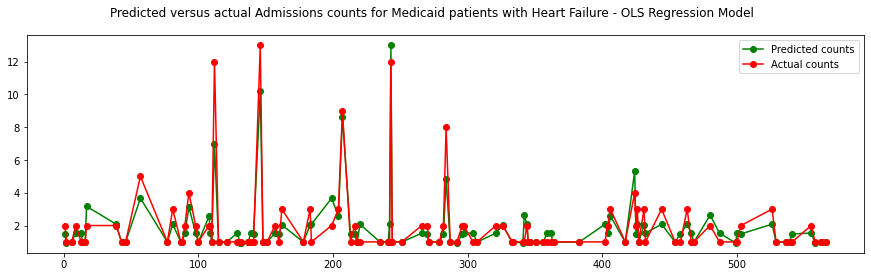

In [27]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['AdmissionCount']
fig = plt.figure(figsize=(15,4))
fig.suptitle('Predicted versus actual Admissions counts for Medicaid patients with Heart Failure - OLS Regression Model')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

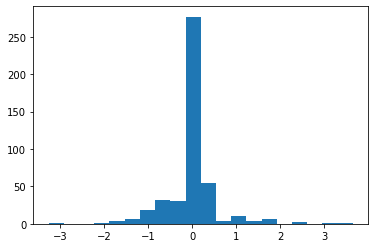

In [28]:
plt.hist(olsr_results.resid, bins=20)
plt.show()


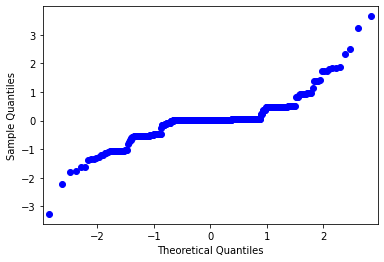

In [29]:
fig = sm.qqplot(olsr_results.resid)
plt.show()


In [29]:
# Run Negative Binomial Class Model
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=olsr_results.params[0])).fit()
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         AdmissionCount   No. Observations:                  447
Model:                            GLM   Df Residuals:                      443
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -602.82
Date:                Sat, 14 May 2022   Deviance:                       60.113
Time:                        21:58:28   Pearson chi2:                     63.8
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [30]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [31]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
3    1.139389  0.074804       1.001817       1.295852
5    1.139389  0.074804       1.001817       1.295852
8    1.379030  0.085909       1.220526       1.558119
12   1.139389  0.074804       1.001817       1.295852
15   1.139389  0.074804       1.001817       1.295852
..        ...       ...            ...            ...
522  1.379030  0.085909       1.220526       1.558119
542  2.445001  0.168498       2.136083       2.798594
543  1.178060  0.146176       0.923738       1.502402
554  1.182400  0.118903       0.970882       1.439998
564  1.178060  0.146176       0.923738       1.502402

[122 rows x 4 columns]


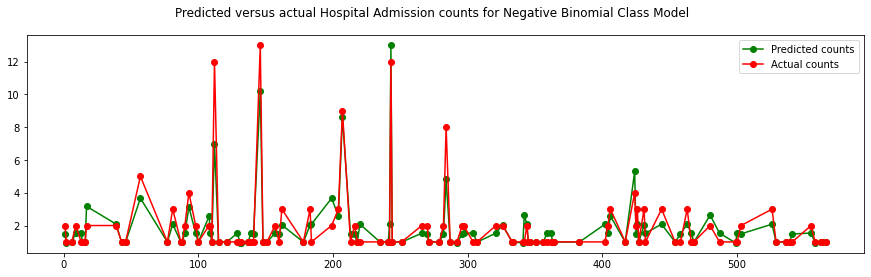

In [30]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['AdmissionCount']
fig = plt.figure(figsize=(15,4))
fig.suptitle('Predicted versus actual Hospital Admission counts for Negative Binomial Class Model')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [31]:
# using the statsmodels GLM class, train the Poisson regresion model on the training data set

In [32]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [33]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         AdmissionCount   No. Observations:                  456
Model:                            GLM   Df Residuals:                      452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -570.48
Date:                Sun, 15 May 2022   Deviance:                       104.53
Time:                        15:12:11   Pearson chi2:                     116.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [34]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
1    1.368852  0.096771       1.191739       1.572288
2    1.173133  0.088266       1.012287       1.359537
6    1.211610  0.104761       1.022738       1.435362
9    1.478529  0.075547       1.337632       1.634266
13   1.478529  0.075547       1.337632       1.634266
..        ...       ...            ...            ...
555  1.413748  0.120043       1.197003       1.669740
558  1.173133  0.088266       1.012287       1.359537
562  1.211610  0.104761       1.022738       1.435362
563  1.211610  0.104761       1.022738       1.435362
566  1.211610  0.104761       1.022738       1.435362

[113 rows x 4 columns]


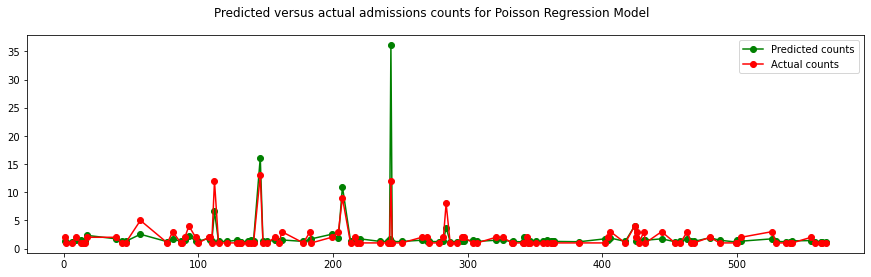

In [36]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['AdmissionCount']
fig = plt.figure(figsize=(15,4))
fig.suptitle('Predicted versus actual admissions counts for Poisson Regression Model')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

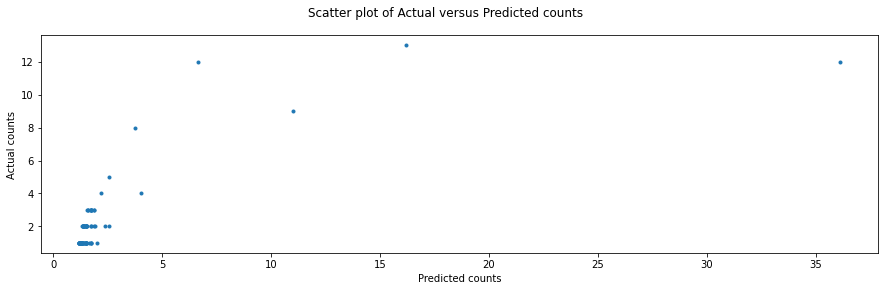

In [37]:
plt.clf()
fig = plt.figure(figsize=(15, 4))
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [40]:
pip install yellowbrick

  Attempting uninstall: joblib
    Found existing installation: joblib 0.16.0
    Uninstalling joblib-0.16.0:
      Successfully uninstalled joblib-0.16.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Apps\\Anaconda\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [41]:
# Unsupervised Learning K Means Clustering
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
one_hot_encoded_data.drop("pat_id", axis=1, inplace=True)

In [ ]:
scaler = MinMaxScaler((0,1))
scaled_df = scaler.fit_transform(one_hot_encoded_data)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

In [ ]:
kmeans.n_clusters # total count of clusters
kmeans.cluster_centers_ # clusters' centers
kmeans.labels_ # a label for each observation
kmeans.inertia_ # we can say sum of error

In [ ]:
scaled_df = pd.DataFrame(scaled_df)

In [ ]:
plt.scatter(scaled_df.iloc[:, 0],
scaled_df.iloc[:, 1],
c=kmeans.labels_,
s=50,
cmap="viridis")
plt.show()

In [ ]:
# getting centroids
centroids = kmeans.cluster_centers_ 
# plotting the data by 1st and 2nd dimensions
plt.scatter(scaled_df.iloc[:, 0],
scaled_df.iloc[:, 1],
c=kmeans.labels_,
s=50,
cmap="viridis")
# plotting the centroids
plt.scatter(centroids[:, 0],
centroids[:, 1],
c="red",
s=200,
alpha=0.8)
plt.show()

In [ ]:
inertias = []
cluster_range = range(1,20)

In [ ]:
for cluster_count in cluster_range:
    kmeans = KMeans(n_clusters=cluster_count).fit(scaled_df)
    inertias.append(kmeans.inertia_)

In [ ]:
plt.plot(cluster_range, inertias)
plt.xlabel("Inertia Value for each Cluster Count")
plt.title("Cluster Count")
plt.show()